In [1]:
def load_annotations(anno_path):
        with open(anno_path, 'r') as f:
            lines = f.readlines()
        return lines

In [5]:
lines = load_annotations('data/exdark_train.txt')

In [20]:
bbox_list = lines[1].split(' ')[1:]
bbox_list

['174,64,329,284,7', '411,55,557,304,7', '4,144,141,433,7\n']

In [2]:
import torch
# check gpu name by torch
for i in range(4):
    print(torch.cuda.get_device_name(i))
# torch.cuda.get_device_name(0)


NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090


In [5]:
# check cpu name by os info
import os


AttributeError: module 'os' has no attribute 'cpu_info'

In [1]:
! chmod 600 /home/ubuntu/.kaggle/kaggle.json

In [2]:
!kaggle datasets download hongngnguyn/exdarkdataset

100%|█████████████████████████████████████▉| 1.39G/1.39G [05:26<00:00, 4.85MB/s]
100%|██████████████████████████████████████| 1.39G/1.39G [05:26<00:00, 4.56MB/s]


In [3]:
!unzip exdarkdataset.zip -d dataset

/bin/bash: line 1: unzip: command not found


In [1]:
!nvidia-smi

Fri Jun 17 08:48:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:88:00.0 Off |                  N/A |
| 43%   50C    P2   111W / 350W |   2280MiB / 24576MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:89:00.0 Off |                  N/A |
| 56%   

In [6]:
!python train.py

Traceback (most recent call last):
  File "/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/train.py", line 2, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [3]:
cd vision

/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/vision


In [5]:
!cp references/detection/utils.py ../
!cp references/detection/transforms.py ../
!cp references/detection/coco_eval.py ../
!cp references/detection/engine.py ../
!cp references/detection/coco_utils.py ../

In [1]:
!nvidia-smi

Thu Jun 16 23:47:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:88:00.0 Off |                  N/A |
| 42%   49C    P2   124W / 350W |   2280MiB / 24576MiB |     20%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:89:00.0 Off |                  N/A |
| 67%   

In [11]:

import pandas as pd
import numpy as np
import yaml
import torch
from tqdm.notebook import tqdm
# from models import ObjectDetection, make_ensemble_predictions, run_wbf
from metrics import calculate_image_precision
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torchvision
import matplotlib.pyplot as plt
import os

#set enviroment
CUDA_LAUNCH_BLOCKING=1

device = torch.device("cuda:3"
                      if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
model = torchvision.models.detection.ssd300_vgg16(num_classes=13).to(device)
# model.load_state_dict(torch.load("checkpoints/best.pth"))
model.eval()
# transform = A.Compose([
#     ToTensorV2(p=1.0)
# ])
# img = cv2.imread('Dataset/2015_06963.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
# img /= 255.0
# img = transform(image=img)['image']

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [5]:
gts = [[551, 239, 631, 380],
       [4, 304, 305, 476],
       [31, 270, 183, 467],
       [548, 265, 640, 388],
       [244, 265, 449, 429],
       [114, 305, 305, 477],
       [264, 227, 338, 408],
       [313, 237, 433, 433]
       ]

In [6]:
predict = model(img.unsqueeze(0).to(device))
predict

/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180487213/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[{'boxes': tensor([[1.8835e+02, 0.0000e+00, 3.6594e+02, 4.3455e+01],
          [2.3154e+02, 1.1267e+01, 3.8380e+02, 6.5504e+01],
          [1.2944e+02, 1.6128e+01, 2.7813e+02, 7.4188e+01],
          [1.5907e+02, 1.9621e+02, 3.3185e+02, 2.1231e+02],
          [1.7492e+02, 1.8932e+02, 3.0922e+02, 2.2766e+02],
          [2.3342e+02, 4.3134e+01, 5.0333e+02, 7.0236e+01],
          [2.7223e+02, 6.5136e+01, 5.1840e+02, 1.0845e+02],
          [1.7747e+02, 0.0000e+00, 2.1421e+02, 0.0000e+00],
          [2.7643e+02, 2.7479e+01, 4.4978e+02, 7.3237e+01],
          [2.8654e+02, 2.8095e+02, 3.0100e+02, 3.7409e+02],
          [2.6274e+02, 8.8083e+01, 4.0301e+02, 1.3319e+02],
          [2.4610e+02, 2.1037e+01, 4.7444e+02, 4.5839e+01],
          [6.2099e+01, 1.8142e+02, 4.0813e+02, 2.4482e+02],
          [2.9989e+02, 1.0329e+02, 4.4147e+02, 1.3682e+02],
          [1.1585e+02, 0.0000e+00, 2.0578e+02, 5.6396e+01],
          [2.4977e+02, 2.9356e+02, 2.7164e+02, 3.7509e+02],
          [0.0000e+00, 1.6408e+

In [7]:
boxes = predict[0]['boxes'].cpu().detach().numpy()

In [9]:
calculate_image_precision(gts, boxes)

AttributeError: 'list' object has no attribute 'sum'

labels: [11, 11, 4, 4, 11, 11, 6]
bounding box is: [188   0 365  43]
bounding box is: [231  11 383  65]
bounding box is: [129  16 278  74]
bounding box is: [159 196 331 212]
bounding box is: [174 189 309 227]
bounding box is: [233  43 503  70]
bounding box is: [272  65 518 108]
bounding box is: [177   0 214   0]
bounding box is: [276  27 449  73]
bounding box is: [286 280 300 374]
bounding box is: [262  88 403 133]
bounding box is: [246  21 474  45]
bounding box is: [ 62 181 408 244]
bounding box is: [299 103 441 136]
bounding box is: [115   0 205  56]
bounding box is: [249 293 271 375]
bounding box is: [  0 164 305 259]
bounding box is: [364   0 382  57]
bounding box is: [206 230 586 275]
bounding box is: [172  50 446 112]
bounding box is: [421   0 444  77]
bounding box is: [354   5 377  99]
bounding box is: [212   0 257   0]
bounding box is: [317 248 331 357]
bounding box is: [130 238 421 344]
bounding box is: [384   0 419  61]
bounding box is: [227   0 291   0]
bounding box is: [250

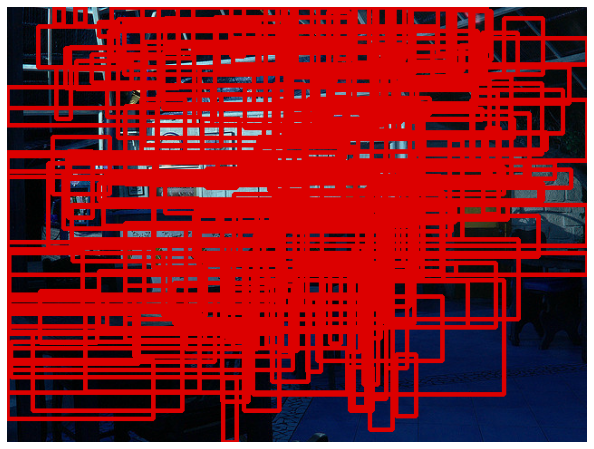

In [10]:
boxes = predict[0]['boxes'].cpu().detach().numpy().astype(np.int32)
# boxss = [boxes[0], boxes[1], boxes[3], boxes[4], boxes[5],  boxes[6], boxes[25]]
labels = predict[0]['labels'].cpu().detach().numpy()
label_match = [labels[0], labels[1], labels[3], labels[4], labels[5],  labels[6], labels[25]]
print(f"labels: {label_match}")
# sample = imgs[4].permute(1, 2, 0).cpu().numpy()
# print(f"image path is {img_paths[id]}")
test = cv2.imread('Dataset/2015_06963.jpg')
# test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB).astype(np.float32)
# test = transform(image=test)['image']
# test = test.permute(1,2,0).cpu().numpy()
# print(f"shape of test is {test.shape}")
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:   
#     # print(f"box is {box} and type is {type(box[0])}") 
    cv2.rectangle(test,
                (box[0], box[1]),
                (box[2], box[3]),
                (220, 0, 0), 3)
    print(f"bounding box is: {box}")

ax.set_axis_off()
ax.imshow(test)


In [1]:
!nvidia-smi

Fri Jun 17 13:48:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:88:00.0 Off |                  N/A |
| 46%   52C    P2   109W / 350W |   2280MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:89:00.0 Off |                  N/A |
| 68%   

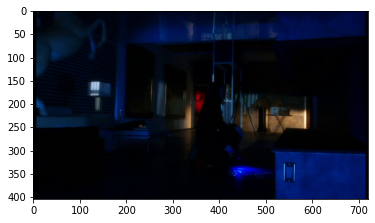

In [34]:
import numpy as np
import pandas as pd
# import cv as cv 
import cv2
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

nat = cv2.imread('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Dataset/2015_07338.png')
nat_2 = cv2.cvtColor(nat, cv2.COLOR_BGR2RGB)
plt.imshow(nat_2)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)




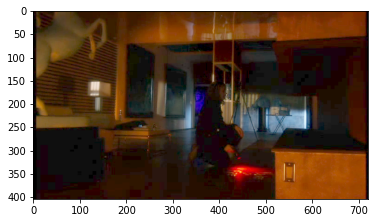

In [37]:
gamma = 2.0     # change the value here to get different result
adjusted = gammaCorrection(nat_2, gamma=gamma)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

In [17]:
type(adjusted)

numpy.ndarray